In [1]:
### Import data analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



In [2]:
os.getcwd()

'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble3'

In [52]:
data = pd.read_csv('ensemble3_output.csv', delimiter=' ')

In [53]:
data.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,15000.0,86400.0,0.000032,0.00004,1.157407e-07,1.157407e-07,1.000000e-17,0.0,1.024500e-07,0.000102,...,2120.428441,2349.235195,2397.305204,2395.490214,2405.197061,270.080343,287.095455,571.126440,0.0,324.0
1,15001.0,86400.0,0.000032,0.00004,1.157407e-07,1.157407e-07,1.000000e-17,0.0,1.024500e-07,0.000102,...,2154.700807,2159.787961,2434.227937,2434.227928,2434.227939,266.143077,291.695650,120.540403,0.0,222.0
2,15002.0,86400.0,0.000032,0.00004,1.157407e-07,1.157407e-07,1.000000e-17,0.0,1.024500e-07,0.000102,...,2154.709707,2162.364347,2434.227941,2434.227941,2434.227941,266.365903,291.709481,122.262001,0.0,222.0
3,15003.0,86400.0,0.000032,0.00004,1.157407e-07,1.157407e-07,1.000000e-17,0.0,1.024500e-07,0.001025,...,2120.428441,2349.235195,2397.305204,2395.490214,2405.197061,270.080343,287.095455,571.126440,0.0,324.0
4,15004.0,86400.0,0.000032,0.00004,1.157407e-07,1.157407e-07,1.000000e-17,0.0,1.024500e-07,0.001025,...,2154.700807,2159.787961,2434.227937,2434.227928,2434.227939,266.143077,291.695650,120.540403,0.0,222.0


In [12]:
data.shape

(4860, 42)

In [13]:
### show the last rows of the data

data.tail()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
4855,19855.0,86400.0,0.000032,0.00004,0.000116,0.0,0.0,0.0,0.00001,0.001025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,444.0
4856,19856.0,86400.0,0.000032,0.00004,0.000116,0.0,0.0,0.0,0.00001,0.001025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,444.0
4857,19857.0,86400.0,0.000032,0.00004,0.000116,0.0,0.0,0.0,0.00001,0.010245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,444.0
4858,19858.0,86400.0,0.000032,0.00004,0.000116,0.0,0.0,0.0,0.00001,0.010245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,444.0
4859,19859.0,86400.0,0.000032,0.00004,0.000116,0.0,0.0,0.0,0.00001,0.010245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,444.0


In [56]:
### Select all rows where PO4(1) > 1 and PO4(3) > 1 and NO3(1) > 20 and NO3(3) > 20

data_sel = data[(data['PO4(1)'] > 1) & (data['PO4(3)'] > 1) & (data['NO3(1)'] > 20) & (data['NO3(3)'] > 20)]

In [57]:
data_sel.shape

(218, 42)

In [58]:
### Select all rows where LDOC(1) > 0, LDOC(2) > 0, LDOC(3) > 0
### Select all rows where LDOC(1) < 80, LDOC(2) < 80, LDOC(3) < 80

data_sel = data_sel[(data_sel['LDOC(1)'] > 0) & (data_sel['LDOC(2)'] > 0) & (data_sel['LDOC(3)'] > 0)]
data_sel = data_sel[(data_sel['LDOC(1)'] < 100) & (data_sel['LDOC(2)'] < 100) & (data_sel['LDOC(3)'] < 100)]

In [59]:
data_sel.shape

(115, 42)

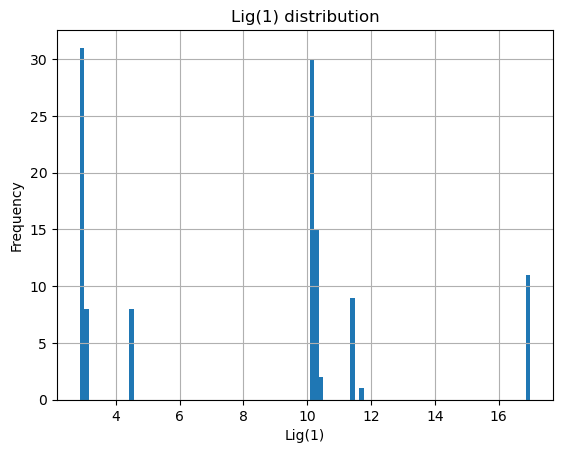

517     16.980462
518      4.503806
520     16.980434
521      4.503567
526     16.978728
          ...    
2420     2.863916
2422    10.343800
2426     2.863426
2428    10.194127
2429     2.863401
Name: Lig(1), Length: 115, dtype: float64


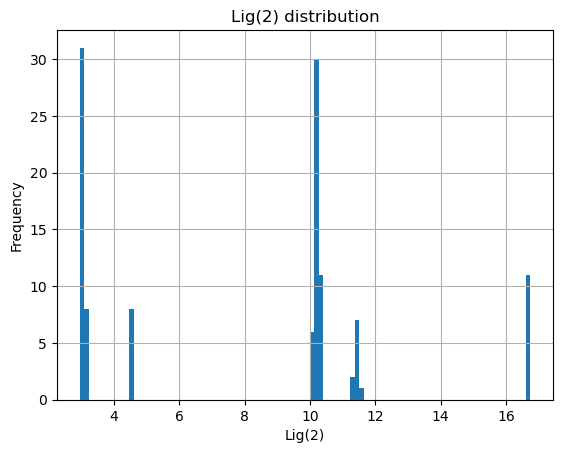

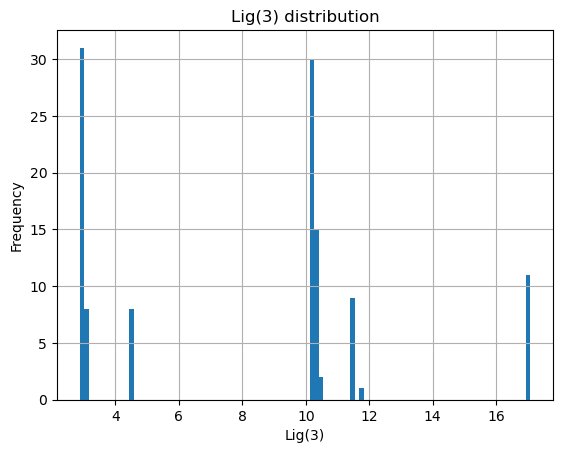

In [60]:
### show the distribuion of Lig(1), Lig(2) and Lig(3)

data_sel['Lig(1)'].hist(bins=100)
plt.xlabel('Lig(1)')
plt.ylabel('Frequency')
plt.title('Lig(1) distribution')
plt.show()


data_sel['Lig(2)'].hist(bins=100)
plt.xlabel('Lig(2)')
plt.ylabel('Frequency')
plt.title('Lig(2) distribution')
plt.show()

data_sel['Lig(3)'].hist(bins=100)
plt.xlabel('Lig(3)')
plt.ylabel('Frequency')
plt.title('Lig(3) distribution')
plt.show()


In [61]:
print('phi', data_sel['phi'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('m_l', data_sel['m_l'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('m_q', data_sel['m_q'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('mu0', data_sel['mu0'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('kfe_p', data_sel['kfe_p'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('kldoc_p', data_sel['kldoc_p'].value_counts(normalize=True))

phi 0.001    0.591304
0.010    0.408696
Name: phi, dtype: float64
-----------------------------------------------------------------
m_l 1.157000e-14    0.173913
0.000000e+00    0.173913
1.157407e-10    0.165217
1.157400e-12    0.165217
1.157400e-13    0.165217
1.157407e-11    0.156522
Name: m_l, dtype: float64
-----------------------------------------------------------------
m_q 0.0    1.0
Name: m_q, dtype: float64
-----------------------------------------------------------------
mu0 1.157407e-07    0.608696
1.157407e-06    0.391304
Name: mu0, dtype: float64
-----------------------------------------------------------------
kfe_p 1.024500e-06    0.356522
1.024500e-05    0.330435
1.024500e-07    0.313043
Name: kfe_p, dtype: float64
-----------------------------------------------------------------
kldoc_p 0.010245    0.573913
0.001025    0.313043
0.000102    0.113043
Name: kldoc_p, dtype: float64


In [44]:
### Select all rows where Lig(1) > 0, Lig(2) > 0, Lig(3) > 0
### Select all rows where Lig(1) < 6, Lig(2) < 6, Lig(3) < 6

data_sel = data_sel[(data_sel['Lig(1)'] > 0) & (data_sel['Lig(2)'] > 0) & (data_sel['Lig(3)'] > 0)]
data_sel = data_sel[(data_sel['Lig(1)'] < 6) & (data_sel['Lig(2)'] < 6) & (data_sel['Lig(3)'] < 6)]


In [45]:
data_sel.shape

(47, 42)

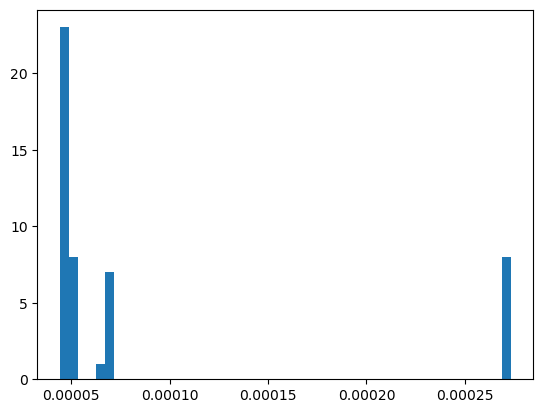

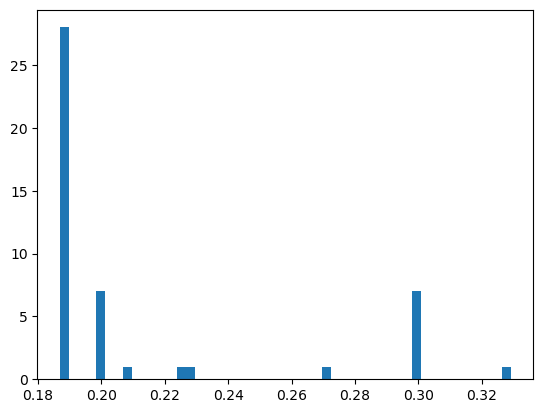

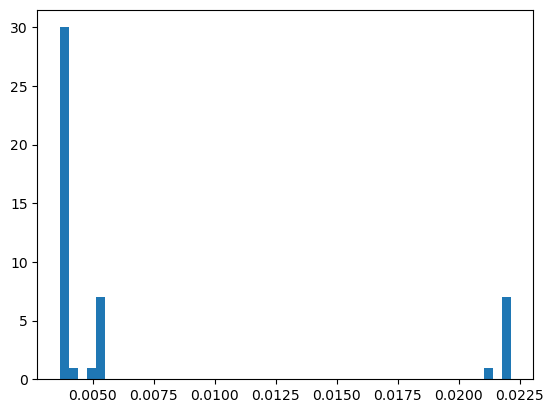

In [46]:
### Show histogram of Fe(1), Fe(2), Fe(3)

plt.hist(data_sel['Fe(1)'], bins=50)
plt.show()

plt.hist(data_sel['Fe(2)'], bins=50)
plt.show()

plt.hist(data_sel['Fe(3)'], bins=50)
plt.show()


In [49]:
### show all all data including all columns of the data table





Index(['id', 'dt(s)', 't(yr)', 'rFeC_pb', 'mu0', 'm_l', 'm_q', 'kappa',
       'kfe_p', 'kldoc_p', 'pge', 'phi', 'rCLig', 'PB(1)', 'PB(2)', 'PB(3)',
       'LDOC(1)', 'LDOC(2)', 'LDOC(3)', 'Fe(1)', 'Fe(2)', 'Fe(3)', 'PO4(1)',
       'PO4(2)', 'PO4(3)', 'NO3(1)', 'NO3(2)', 'NO3(3)', 'Lig(1)', 'Lig(2)',
       'Lig(3)', 'DIC(1)', 'DIC(2)', 'DIC(3)', 'ALK(1)', 'ALK(2)', 'ALK(3)',
       'OCPCO2(1)', 'OCPCO2(2)', 'OCPCO2(3)', 'ATPCO2', 'Limit'],
      dtype='object')

In [48]:
print('phi', data_sel['phi'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('m_l', data_sel['m_l'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('m_q', data_sel['m_q'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('mu0', data_sel['mu0'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('kfe_p', data_sel['kfe_p'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('kldoc_p', data_sel['kldoc_p'].value_counts(normalize=True))

phi 0.01    1.0
Name: phi, dtype: float64
-----------------------------------------------------------------
m_l 1.157407e-10    0.170213
1.157407e-11    0.170213
1.157400e-12    0.170213
1.157000e-14    0.170213
0.000000e+00    0.170213
1.157400e-13    0.148936
Name: m_l, dtype: float64
-----------------------------------------------------------------
m_q 0.0    1.0
Name: m_q, dtype: float64
-----------------------------------------------------------------
mu0 1.157407e-07    0.510638
1.157407e-06    0.489362
Name: mu0, dtype: float64
-----------------------------------------------------------------
kfe_p 1.024500e-07    0.382979
1.024500e-06    0.382979
1.024500e-05    0.234043
Name: kfe_p, dtype: float64
-----------------------------------------------------------------
kldoc_p 0.010245    0.638298
0.001025    0.361702
Name: kldoc_p, dtype: float64


In [22]:
### Select all rows where Fe(1) > 0.001, Fe(2) > 0.3, Fe(3) > 0.2

data_sel = data_sel[(data_sel['Fe(1)'] > 0.001) & (data_sel['Fe(2)'] > 0.1) & (data_sel['Fe(3)'] > 0.2)]


In [23]:
data_sel.shape

(0, 42)

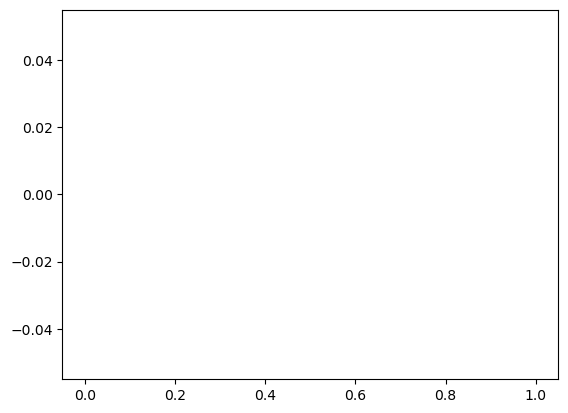

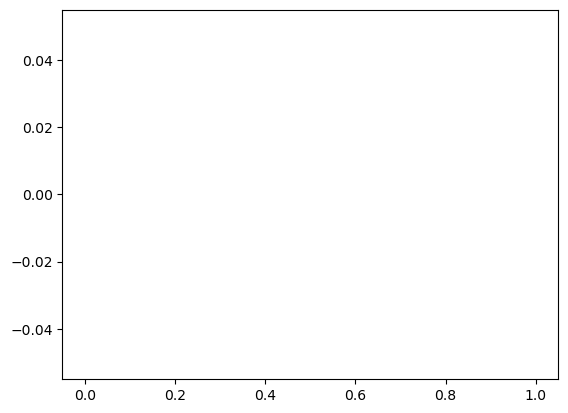

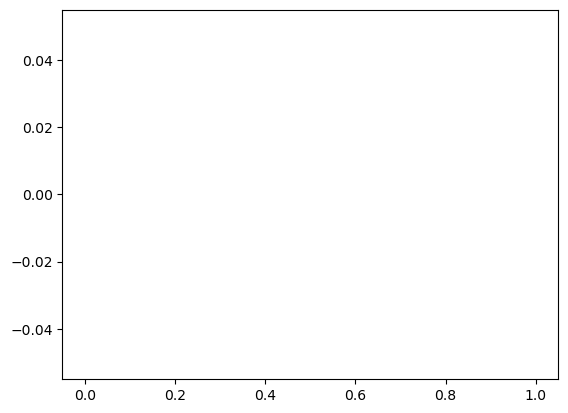

In [24]:
### Show histogram of PB(1), PB(2), PB(3)

plt.hist(data_sel['PB(1)'], bins=50)
plt.show()

plt.hist(data_sel['PB(2)'], bins=50)
plt.show()

plt.hist(data_sel['PB(3)'], bins=50)
plt.show()

In [ ]:
### Select rows where PB(1) > 5, PB(2) > 5, PB(3) > 5
### Select rows where PB(1) < 500, PB(2) < 500, PB(3) < 500

data_sel = data_sel[(data_sel['PB(1)'] > 5) & (data_sel['PB(2)'] > 5) & (data_sel['PB(3)'] > 5)]
data_sel = data_sel[(data_sel['PB(1)'] < 500) & (data_sel['PB(2)'] < 500) & (data_sel['PB(3)'] < 500)]

In [ ]:
### Get dimensions of data_sel

data_sel.shape

(1712, 42)

In [ ]:
data_sel.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
649,749,86400,0.000003,0.00004,1.157407e-07,1.157407e-08,1.000000e-18,0,1.024500e-07,0.000102,...,2099.874216,2399.435012,2398.052702,2387.738822,2399.317871,287.369859,265.808950,996.995546,0,324
652,752,86400,0.000003,0.00004,1.157407e-07,1.157407e-08,1.000000e-18,0,1.024500e-07,0.001025,...,2100.061384,2398.431438,2398.202694,2387.861589,2399.469014,287.270339,265.935120,985.597480,0,324
655,755,86400,0.000003,0.00004,1.157407e-07,1.157407e-08,1.000000e-18,0,1.024500e-07,0.010245,...,2102.074523,2389.286199,2399.556283,2389.394347,2400.842832,286.365415,267.052634,887.036043,0,324
675,775,86400,0.000003,0.00004,1.157407e-07,1.157407e-08,1.000000e-19,0,1.024500e-07,0.000102,...,2099.846777,2399.554472,2398.023653,2387.725904,2399.299646,287.388905,265.784674,998.362372,0,324
676,776,86400,0.000003,0.00004,1.157407e-07,1.157407e-08,1.000000e-19,0,1.024500e-07,0.000102,...,2099.859451,2399.457416,2398.043471,2387.736752,2399.314212,287.383971,265.790331,997.254197,0,324


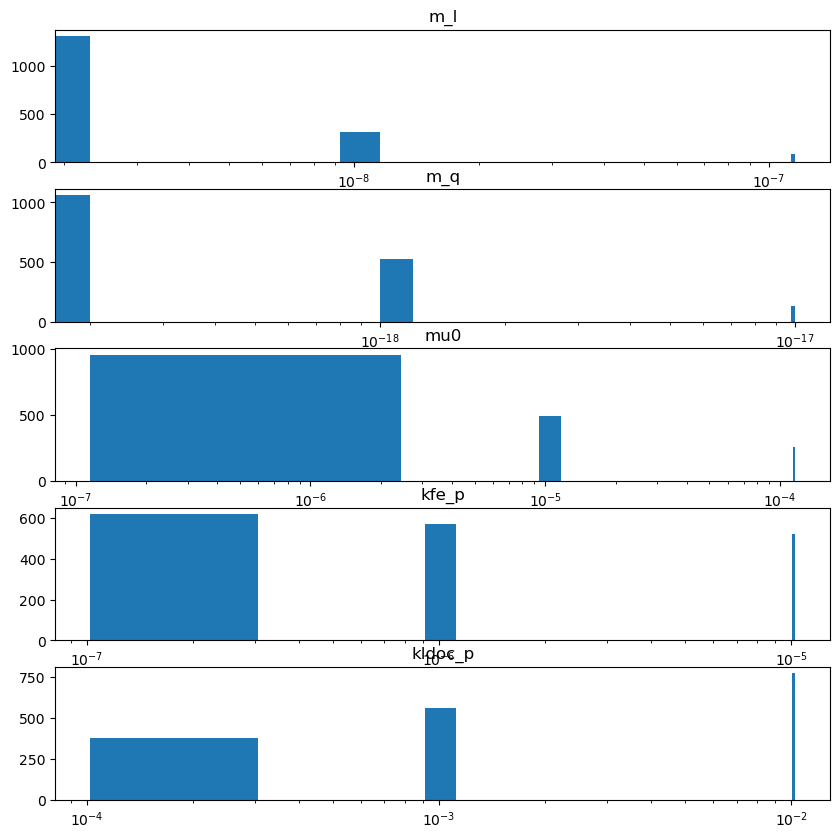

In [ ]:
### show the distribution of m_l, m_q, mu0, kfe_p, kldoc_p
### Show in historgrams in figure with 5 subplots
### use log scale for the x-axis

fig, axs = plt.subplots(5, sharex=False, sharey=False, figsize=(10, 10))

# Plot for 'm_l'
axs[0].hist(data_sel['m_l'], bins=50)
axs[0].set_title('m_l')
axs[0].set_xscale('log')  # Set log scale on the x-axis

# Plot for 'm_q'
axs[1].hist(data_sel['m_q'], bins=50)
axs[1].set_title('m_q')
axs[1].set_xscale('log')  # Set log scale on the x-axis

# Plot for 'mu0'
axs[2].hist(data_sel['mu0'], bins=50)
axs[2].set_title('mu0')
axs[2].set_xscale('log')  # Set log scale on the x-axis

# Plot for 'kfe_p'
axs[3].hist(data_sel['kfe_p'], bins=50)
axs[3].set_title('kfe_p')
axs[3].set_xscale('log')  # Set log scale on the x-axis

# Plot for 'kldoc_p'
axs[4].hist(data_sel['kldoc_p'], bins=50)
axs[4].set_title('kldoc_p')
axs[4].set_xscale('log')  # Set log scale on the x-axis

plt.show()


In [ ]:
### Show the unique values for each parameter

### And give the proportion of the total number of rows for each unique value
print('phi', data_sel['phi'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('m_l', data_sel['m_l'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('m_q', data_sel['m_q'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('mu0', data_sel['mu0'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('kfe_p', data_sel['kfe_p'].value_counts(normalize=True))
print('-----------------------------------------------------------------')
print('kldoc_p', data_sel['kldoc_p'].value_counts(normalize=True))




phi 0.0001    0.455023
0.0010    0.350467
0.0100    0.194509
Name: phi, dtype: float64
-----------------------------------------------------------------
m_l 1.157407e-08    0.183411
1.157407e-09    0.167640
0.000000e+00    0.099883
1.157407e-10    0.099299
1.157407e-11    0.099299
1.157407e-14    0.099299
1.157407e-12    0.098715
1.157407e-13    0.098715
1.157407e-07    0.053738
Name: m_l, dtype: float64
-----------------------------------------------------------------
m_q 1.000000e-18    0.306075
1.000000e-19    0.275117
1.000000e-20    0.176986
0.000000e+00    0.166472
1.000000e-17    0.075350
Name: m_q, dtype: float64
-----------------------------------------------------------------
mu0 1.157407e-06    0.327103
1.157407e-05    0.289136
1.157407e-07    0.233061
1.157407e-04    0.150701
Name: mu0, dtype: float64
-----------------------------------------------------------------
kfe_p 1.024500e-07    0.361565
1.024500e-06    0.334112
1.024500e-05    0.304322
Name: kfe_p, dtype: float64
